In [8]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

df=pd.read_csv("\\Users\\MCarrilloL\\Documents\\GitHub\\HerramientasComputacionales\\Pandas\\catalogo_prueba.csv")
#print(df.head())
print(df.columns)
print(df.dtypes)
print(df.isnull().sum())

Index(['Fecha', 'Hora', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
       'Referencia de localizacion', 'Fecha UTC', 'Hora UTC', 'Estatus'],
      dtype='object')
Fecha                          object
Hora                           object
Magnitud                      float64
Latitud                       float64
Longitud                      float64
Profundidad                   float64
Referencia de localizacion     object
Fecha UTC                      object
Hora UTC                       object
Estatus                        object
dtype: object
Fecha                         0
Hora                          0
Magnitud                      0
Latitud                       0
Longitud                      0
Profundidad                   0
Referencia de localizacion    0
Fecha UTC                     0
Hora UTC                      0
Estatus                       0
dtype: int64


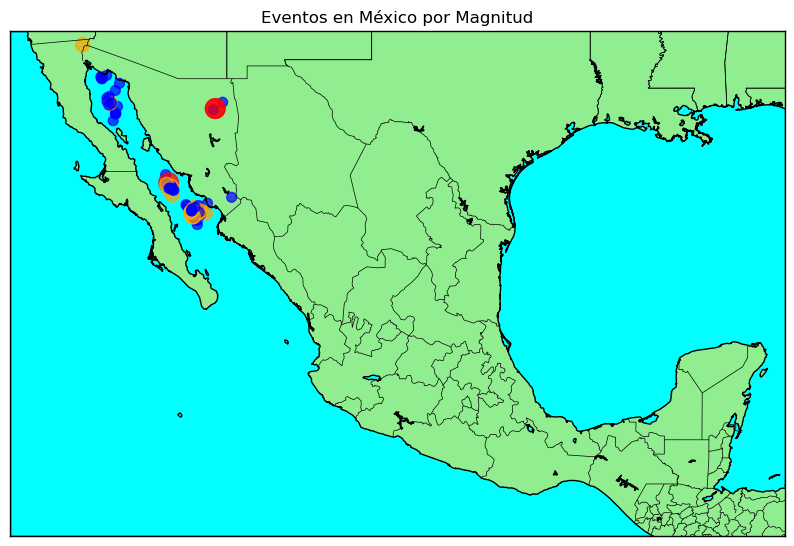

In [2]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=14, urcrnrlat=33, llcrnrlon=-118, urcrnrlon=-86, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Convertir latitudes y longitudes a las coordenadas del mapa
x, y = m(df['Longitud'].values, df['Latitud'].values)

# Asignar tamaños y colores según la magnitud
sizes = []
colors = []
for mag in df['Magnitud']:
    if 3 <= mag < 4:
        sizes.append(50)   # Tamaño pequeño
        colors.append('blue')  # Color azul
    elif 4 <= mag < 5:
        sizes.append(100)  # Tamaño mediano
        colors.append('orange')  # Color naranja
    else:
        sizes.append(200)  # Tamaño grande
        colors.append('red')  # Color rojo

# Graficar los puntos en el mapa
m.scatter(x, y, s=sizes, c=colors, marker='o', alpha=0.7)

# Mostrar el mapa
plt.title('Eventos en México por Magnitud')
plt.show()

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
# Extraer el mes de la columna de fecha
df['Mes'] = df['Fecha'].dt.month

# Contar cuántos sismos hubo en cada mes
sismos_por_mes = df['Mes'].value_counts().sort_index()

# Imprimir los resultados
print(sismos_por_mes)




Mes
1    18
2    74
3     8
4    26
5     8
6    16
7     8
8    13
Name: count, dtype: int64


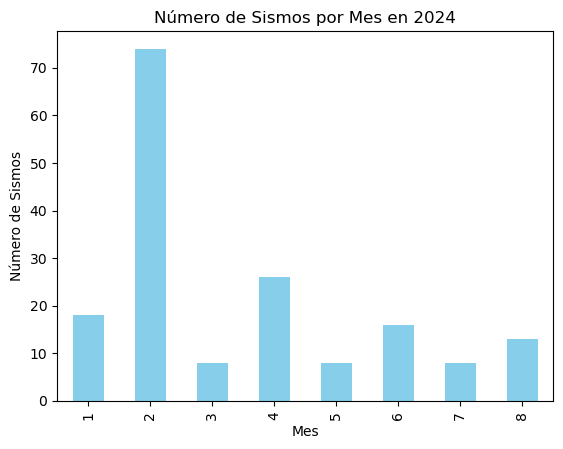

In [4]:
# Graficar el número de sismos por mes
sismos_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Sismos')
plt.title('Número de Sismos por Mes en 2024')
plt.show()


In [5]:
# Diccionario que mapea los números de los meses a los nombres
meses_nombres = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Asignar los nombres de los meses utilizando el diccionario
df['Mes_Nombre'] = df['Mes'].map(meses_nombres)

# Contar cuántos sismos hubo en cada mes por nombre
sismos_por_mes_nombre = df['Mes_Nombre'].value_counts().reindex(meses_nombres.values(), fill_value=0)

# Imprimir los resultados
print(sismos_por_mes_nombre)


Mes_Nombre
Enero         18
Febrero       74
Marzo          8
Abril         26
Mayo           8
Junio         16
Julio          8
Agosto        13
Septiembre     0
Octubre        0
Noviembre      0
Diciembre      0
Name: count, dtype: int64


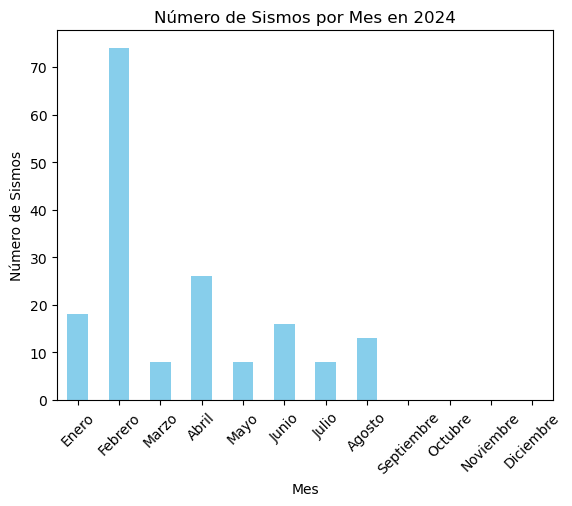

In [6]:
import matplotlib.pyplot as plt

# Graficar el número de sismos por mes con nombres
sismos_por_mes_nombre.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Sismos')
plt.title('Número de Sismos por Mes en 2024')
plt.xticks(rotation=45)  # Rotar los nombres de los meses para mejor legibilidad
plt.show()

In [7]:

# Encontrar la magnitud máxima en el DataFrame
magnitud_maxima = df['Magnitud'].max()

# Filtrar el DataFrame para encontrar la fila con la magnitud máxima
sismo_mas_grande = df[df['Magnitud'] == magnitud_maxima]

# Extraer la fecha del sismo más grande
fecha_sismo_mas_grande = sismo_mas_grande['Fecha'].iloc[0]

# Imprimir el resultado
print(f"El sismo más grande ocurrió el día: {fecha_sismo_mas_grande.strftime('%d/%m/%Y')}")

# Obtener todas las fechas donde ocurrió el sismo más grande
#fechas_sismos_mas_grandes = sismo_mas_grande['Fecha'].dt.strftime('%d/%m/%Y').tolist()
#print(f"Los sismos más grandes ocurrieron en las siguientes fechas: {fechas_sismos_mas_grandes}")


El sismo más grande ocurrió el día: 05/06/2024
